## Final Notebook Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
housing_df = pd.read_csv('data/kc_house_data.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [37]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [38]:
housing_df['datetime'] = pd.to_datetime(housing_df['date'])
housing_df['soldyear'] = housing_df['datetime'].dt.year
housing_df['age_when_sold'] = housing_df['soldyear'] - housing_df['yr_built']

In [39]:
housing_df['grade_num'] = housing_df['grade'].str.split()
housing_df['grade_num'] = housing_df['grade_num'].str[0]
housing_df['grade_num'] = housing_df['grade_num'].astype(int)

In [40]:
housing_df['sqft_basement'] = housing_df['sqft_living'] - housing_df['sqft_above']
housing_df['Basement'] = None
housing_df['Basement'] = housing_df['sqft_basement'].map(lambda x: False if x == 0 else True)
housing_df['Basement'] = housing_df['Basement'].astype(int)

In [41]:
replace_dict = {0.75: 1, 1.75: 2, 2.75: 3, 3.75: 4, 4.75: 5, 5.75: 6, 6.75: 7, 7.75: 8, 
                1.25: 1.5, 2.25: 2.5, 3.25: 3.5, 4.25: 4.5, 5.25: 5.5, 6.25: 6.5}
housing_df['bathrooms'] = housing_df['bathrooms'].replace(replace_dict)

In [42]:
housing_df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [43]:
replace_dict2 = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
housing_df['condition'] = housing_df['condition'].replace(replace_dict2)

In [44]:
from sklearn.impute import SimpleImputer
wtr_col = housing_df[['waterfront']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NO')
imputer.fit(wtr_col)
waterfront_imputed = imputer.transform(wtr_col)
housing_df.waterfront = waterfront_imputed

In [45]:
from sklearn.preprocessing import OrdinalEncoder
wtr_col = housing_df[['waterfront']]
encoder_wtr = OrdinalEncoder()
encoder_wtr.fit(wtr_col)
encoded_wtr = encoder_wtr.transform(wtr_col)
encoded_wtr = encoded_wtr.flatten()
housing_df.waterfront = encoded_wtr

In [46]:
from sklearn.impute import SimpleImputer
view_col = housing_df[['view']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NONE')
imputer.fit(view_col)
view_imputed = imputer.transform(view_col)
housing_df.view = view_imputed

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

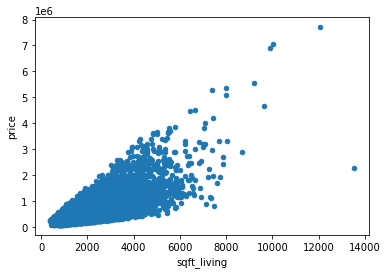

In [26]:
housing_df.plot.scatter('sqft_living', 'price')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale  = ['price', 'sqft_living', 'sqft_lot', 'age_when_sold']
scaler = MinMaxScaler()
scaled_columns = scaler.fit_transform(housing_df[columns_to_scale])

In [ ]:
scaled_columns = pd.DataFrame(scaled_columns)
scaled_columns.columns = columns_to_scale
scaled_columns

In [ ]:
#housing_df['price'] = scaled_columns['price']
#housing_df['sqft_living'] = scaled_columns['sqft_living']
housing_df['sqft_lot'] = scaled_columns['sqft_lot']
housing_df['age_when_sold'] = scaled_columns['age_when_sold']

In [ ]:
housing_df.isna().sum()

In [ ]:
housing_ols = housing_df.drop(['datetime', 'date', 'soldyear', 'yr_built', 'lat', 'long',
'zipcode', 'sqft_above', 'sqft_lot15', 'sqft_living15', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated'], axis = 1)

In [ ]:
housing_ols.head()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'age_when_sold'], axes):
    housing_ols.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [ ]:
housing_ols['sqft_living_poly'] = housing_ols['sqft_living']**2
housing_ols.head()

In [ ]:
f = 'price ~ sqft_living + sqft_living_poly'

In [ ]:
simple_model = ols(formula = f, data = housing_ols).fit()
simple_model_summary = simple_model.summary()
simple_model_summary

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(simple_model, "sqft_living", fig=fig)
plt.show()

In [ ]:
import scipy.stats as stats
residuals = simple_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

In [ ]:
housing_ols.corr()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
condition_ohe = housing_ols[['condition']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
cond_encoded_ohe = pd.DataFrame (ohe.fit_transform(condition_ohe))
cond_encoded_ohe.columns = ohe.get_feature_names(['condition'])

In [ ]:
housing_pred = housing_ols
housing_pred = pd.concat([housing_ols, cond_encoded_ohe], axis = 1)
housing_pred.drop('condition', axis = 1, inplace=True)
housing_pred.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
view_ohe = housing_ols[['view']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(view_ohe)
view_encoded = ohe.transform(view_ohe)

In [ ]:
view_encoded = pd.DataFrame(
    view_encoded,
    columns=ohe.categories_[0],
    index=housing_pred.index)
view_encoded

In [ ]:
housing_pred = pd.concat([housing_pred, view_encoded], axis = 1)
housing_pred.rename(columns={"AVERAGE": "view_avg", "EXCELLENT": "view_excel", "FAIR": "view_fair", "GOOD": "view_good", "NONE": "view_no"}, inplace=True)
housing_pred.drop('view', axis = 1, inplace=True)
housing_pred.head()